<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Single-T1" data-toc-modified-id="Single-T1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Single T1</a></span></li></ul></div>

# Import

In [53]:
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import numpy as np
import sys
sys.path.append("/Users/longnguyen/Documents/Labber/Script")
import Labber
sys.path.append("/Users/longnguyen/Documents/Data/fluxonium")
import h5py

# Single T1 

In [18]:
fname=r'/Users/longnguyen/Documents/Data/fluxonium/Q1_T1_loop.hdf5'
f = h5py.File(fname,'r')
print (f.keys())

<KeysViewHDF5 ['Channels', 'Data', 'Instrument config', 'Instruments', 'Log list', 'Settings', 'Step config', 'Step list', 'Tags']>


In [20]:
f.get('Data').keys()

<KeysViewHDF5 ['Channel names', 'Data', 'Time stamp']>

In [21]:
f.get('Data').get('Data')

<HDF5 dataset "Data": shape (40, 4, 6), type "<f8">

In [28]:
f.get('Data').get('Channel names')[:]

array([(b'Multi-Qubit Pulse Generator - Sequence duration', b''),
       (b'DataFitter - Decay Constant Guess-s', b''),
       (b'Signal Demodulation - Value', b'Real'),
       (b'Signal Demodulation - Value', b'Imaginary')],
      dtype=[('name', 'O'), ('info', 'O')])

In [38]:
time = f.get('Data').get('Data')[:,0,0]*1e6
real = f.get('Data').get('Data')[:,2,0]
imag = f.get('Data').get('Data')[:,3,0]

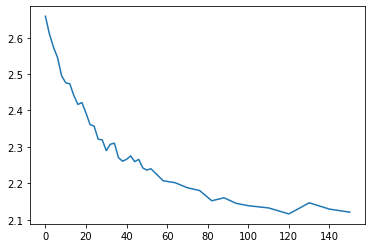

In [40]:
phase = np.angle(real+1j*imag)
plt.plot(time,phase)

Text(0.5, 1.0, '30.537568829965792')

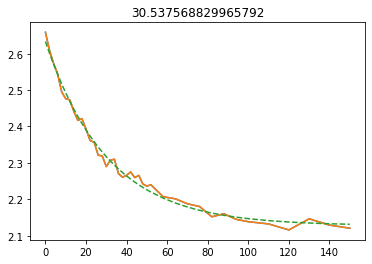

In [52]:
idx = 0


time = f.get('Data').get('Data')[:,0,idx]*1e6
real = f.get('Data').get('Data')[:,2,idx]
imag = f.get('Data').get('Data')[:,3,idx]

phase = np.angle(real+1j*imag)
plt.plot(time,phase)

def exp_func(x,amp,tau,const):
    return amp*np.exp(-x/tau)+const
guess = [np.max(phase) - np.min(phase), 30, np.min(phase)]
opt, cov = curve_fit(exp_func, xdata = time, ydata = phase, p0 = guess)
plt.plot(time,phase)
plt.plot(time,exp_func(time,*opt),'--')
plt.title(opt[1])